In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('supply_chain_data.csv')
pd.set_option('display.max.columns', 24)
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,9,Carrier B,8.630339,Supplier 4,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,3,Carrier C,5.352878,Supplier 3,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,9,Carrier A,7.904846,Supplier 4,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,7,Carrier B,1.409801,Supplier 5,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [5]:
df.nunique()

Product type                 3
SKU                        100
Price                      100
Availability                63
Number of products sold     96
Revenue generated          100
Customer demographics        4
Stock levels                65
Lead times                  29
Order quantities            61
Shipping times              10
Shipping carriers            3
Shipping costs             100
Supplier name                5
Location                     5
Lead time                   29
Production volumes          96
Manufacturing lead time     30
Manufacturing costs        100
Inspection results           3
Defect rates               100
Transportation modes         4
Routes                       3
Costs                      100
dtype: int64

# Sales Analysis

In [6]:
df['Revenue generated'] = round(df['Revenue generated'],2)
sales= df.groupby(['Product type'])[['Number of products sold','Revenue generated']].sum().reset_index()
sales

,Product type,Number of products sold,Revenue generated
0,cosmetics,11757,161521.27
1,haircare,13611,174455.42
2,skincare,20731,241628.17


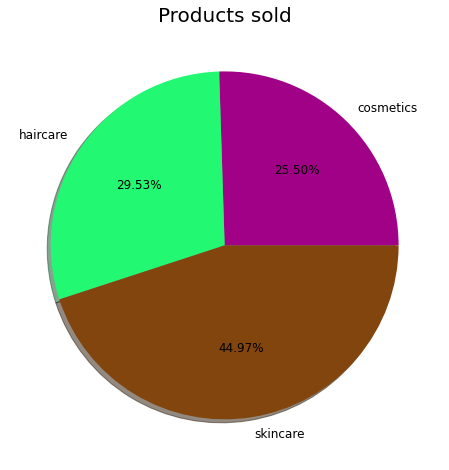

In [7]:
plt.figure(figsize=(10,8))
colors=['#A10187','#23F873','#83450E']
plt.pie(sales['Number of products sold'], autopct='%.2f%%', labels = sales['Product type'],colors=colors,textprops={'size':'large'},
       shadow=True)
plt.title('Products sold',fontsize=20)
plt.show()

#### Skincare products are the highest sold products i.e. almost 45% of the business. The rest is shared by haircare and cosmetics where haircare has a little higher contribution.

Text(0, 0.5, 'Revenue generated')

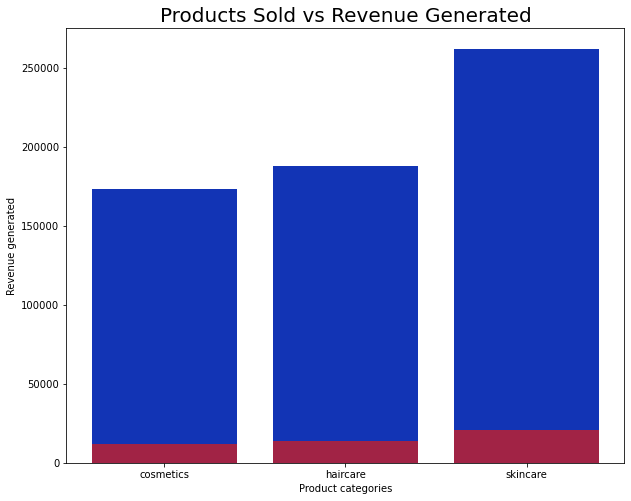

In [8]:
plt.figure(figsize=(10,8))
plt.bar(x=sales['Product type'], height=sales['Number of products sold'], color='#a12345')
plt.bar(x=sales['Product type'], height=sales['Revenue generated'], bottom=sales['Number of products sold'], color='#1234b5')
plt.title('Products Sold vs Revenue Generated', fontsize=20)
plt.xlabel('Product categories')
plt.ylabel('Revenue generated')

#### Skincare products are sold the most and also generates highest revenue followed by haircare and cosmetics.

In [9]:
cd= df.groupby(['Customer demographics','Product type'])['Number of products sold'].sum().reset_index()
cd

,Customer demographics,Product type,Number of products sold
0,Female,cosmetics,4012
1,Female,haircare,936
2,Female,skincare,7853
3,Male,cosmetics,2304
4,Male,haircare,2292
5,Male,skincare,2911
6,Non-binary,cosmetics,2607
7,Non-binary,haircare,2820
8,Non-binary,skincare,5153
9,Unknown,cosmetics,2834


Text(0.5, 1.0, 'Customer demographics vs products sold')

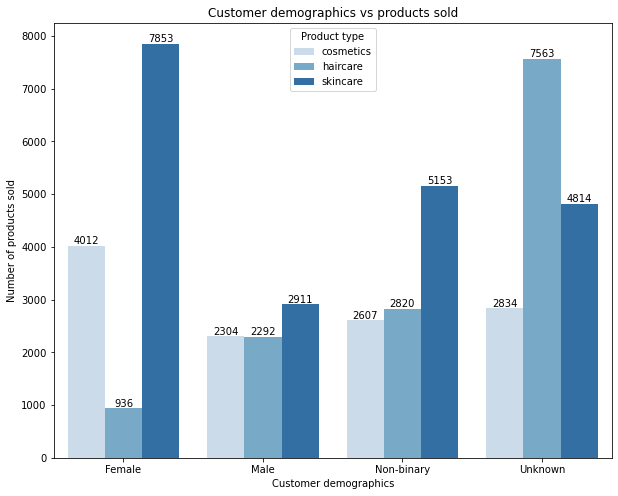

In [10]:
plt.figure(figsize=(10,8))
bar= sns.barplot(x=cd['Customer demographics'], y=cd['Number of products sold'], hue=cd['Product type'], palette='Blues')
for container in bar.containers:
    bar.bar_label(container, fontsize=10)
plt.title('Customer demographics vs products sold')

#### Skincare products are the most popular among all the customer segments except the unknown segment which leans more towards haircare. Female segment are the biggest buyers of skincare products.

In [11]:
stock=df.groupby(['Product type'])[['Availability','Stock levels']].sum().reset_index()
stock

,Product type,Availability,Stock levels
0,cosmetics,1332,1525
1,haircare,1471,1644
2,skincare,2037,1608


Text(0.5, 1.0, 'Product type vs Stock levels')

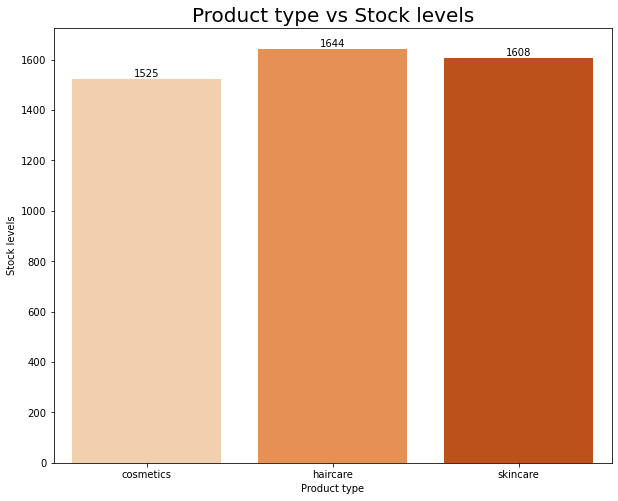

In [12]:
plt.figure(figsize=(10,8))
p=sns.barplot(x=stock['Product type'], y=stock['Stock levels'], palette='Oranges')
for container in p.containers:
    p.bar_label(container,fontsize=10)
plt.title('Product type vs Stock levels', fontsize=20)

Text(0.5, 1.0, 'Stock levels and Availability')

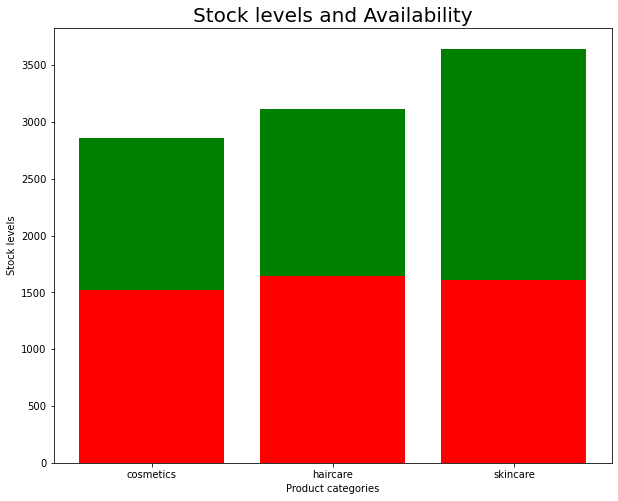

In [13]:
plt.figure(figsize=(10,8))
plt.bar(x=stock['Product type'], height=stock['Stock levels'], color='red')
plt.bar(x=stock['Product type'], height=stock['Availability'], bottom=stock['Stock levels'],color='green')
plt.xlabel('Product categories')
plt.ylabel('Stock levels')
plt.title('Stock levels and Availability', fontsize=20)

#### Green part represents availability and red represents stock levels. 
#### The company has equal share of inventory for haircare and cosmetics and bit less stock of skincare products.
#### Cosmetics and haircare have higher stock level and lower availability, which depicts the company can't ship the products quickly because it takes more manufacturing time. On the other hand, skincare has reverse stats which means products can be manufactured and shipped simultaneously.

# Operations Analysis

In [14]:
df.head(3)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8662.00,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.90,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.75,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282


In [15]:
product= df.groupby(['Product type'])[['Lead time', 'Order quantities', 'Production volumes']].mean().reset_index()
product['Lead time']= round(product['Lead time'],2)
product['Order quantities']= round(product['Order quantities'],2)
product['Production volumes']= round(product['Production volumes'],2)
product

,Product type,Lead time,Order quantities,Production volumes
0,cosmetics,13.54,51.65,479.27
1,haircare,18.71,43.53,586.97
2,skincare,18.00,52.48,609.15


In [16]:
avg_costs= df.groupby(['Manufacturing lead time'])['Manufacturing costs'].mean().reset_index()
avg_costs['Manufacturing costs']= round(avg_costs['Manufacturing costs'],2)
avg_costs

,Manufacturing lead time,Manufacturing costs
0,1,69.15
1,2,55.34
2,3,54.92
3,4,27.40
4,5,68.90
5,6,27.80
6,7,70.00
7,8,52.45
8,9,43.09
9,10,39.83


Text(0.5, 1.0, 'Manufacturing lead times and cost')

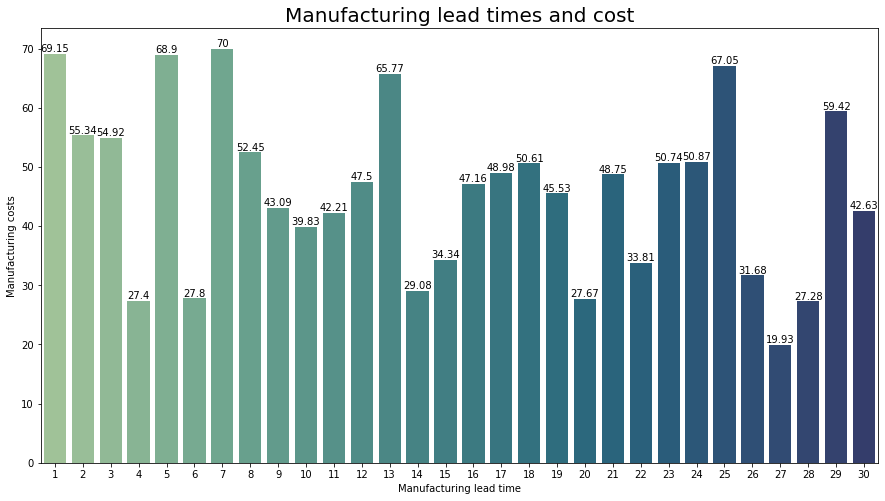

In [17]:
plt.figure(figsize=(15,8))
a= sns.barplot(x=avg_costs['Manufacturing lead time'], y=avg_costs['Manufacturing costs'], palette='crest')
for container in a.containers:
    a.bar_label(container, fontsize=10)
plt.title('Manufacturing lead times and cost', fontsize=20)

#### The products manufactured in 7 minutes costs 70 dollars i.e. the most and products made in 27 minutes costs the least i.e. almost 20 dollars

In [18]:
rate=df.groupby(['Product type', 'Inspection results'])['Defect rates'].mean().reset_index()
rate['Defect rates']= round(rate['Defect rates'],2)
rate

,Product type,Inspection results,Defect rates
0,cosmetics,Fail,2.19
1,cosmetics,Pass,1.82
2,cosmetics,Pending,1.71
3,haircare,Fail,2.53
4,haircare,Pass,2.92
5,haircare,Pending,2.27
6,skincare,Fail,2.90
7,skincare,Pass,1.68
8,skincare,Pending,2.33


In [19]:
round(df['Defect rates'].describe(),2)

count    100.00
mean       2.28
std        1.46
min        0.02
25%        1.01
50%        2.14
75%        3.56
max        4.94
Name: Defect rates, dtype: float64

Text(0.5, 1.0, 'Inspection results Vs Defect rates by Product type')

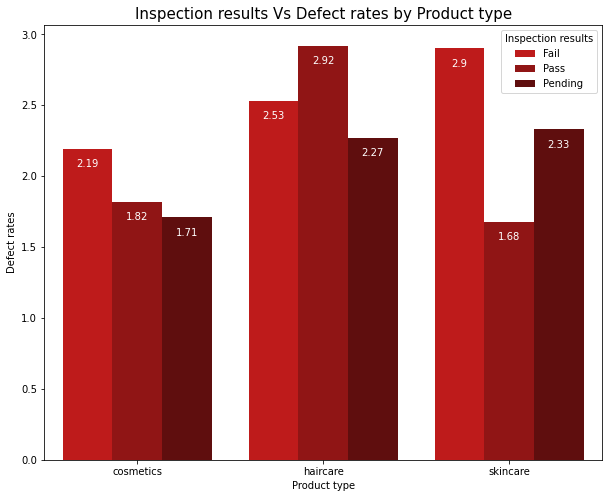

In [20]:
plt.figure(figsize=(10,8))
b= sns.barplot(x=rate['Product type'], y=rate['Defect rates'], hue=rate['Inspection results'], palette='flag')
for container in b.containers:
    b.bar_label(container,fontsize=10,color='white',padding=-20)
plt.title("Inspection results Vs Defect rates by Product type", fontsize = (15))

#### Skincare products have maximum failed results and haircare category has highest passed results.

# Shipping Analysis

In [21]:
ship= df.groupby(['Shipping carriers'])['Shipping costs'].sum().reset_index()
ship['Shipping costs']= round(ship['Shipping costs'],2)
ship

,Shipping carriers,Shipping costs
0,Carrier A,155.54
1,Carrier B,236.90
2,Carrier C,162.38


Text(0.5, 1.0, 'Cost distribution by shiping costs')

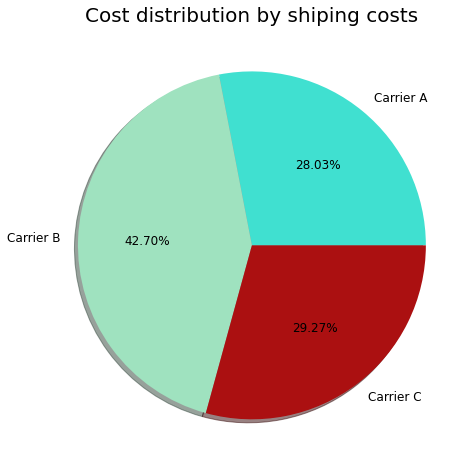

In [22]:
plt.figure(figsize=(10,8))
colors=['#40E0D0', '#9FE2BF', '#AB1011']
plt.pie(ship['Shipping costs'],labels=ship['Shipping carriers'],autopct='%.2f%%',shadow=True,textprops={'size':'large'},colors=colors)
plt.title('Cost distribution by shiping costs', fontsize=20)

#### Carrier A provides the cheapest rates followed by Carrier C, where as Carrier B is the costliest. So, Carrier A has costwise reliability. 

In [23]:
df.head(3)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8662.00,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.90,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.75,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282


In [24]:
cr= df.groupby(['Shipping carriers'])['Revenue generated'].sum().reset_index()
cr['Revenue generated']= round(cr['Revenue generated'],2)
cr

,Shipping carriers,Revenue generated
0,Carrier A,142630.04
1,Carrier B,250094.64
2,Carrier C,184880.18


Text(0.5, 1.0, 'Revenue generated by carriers')

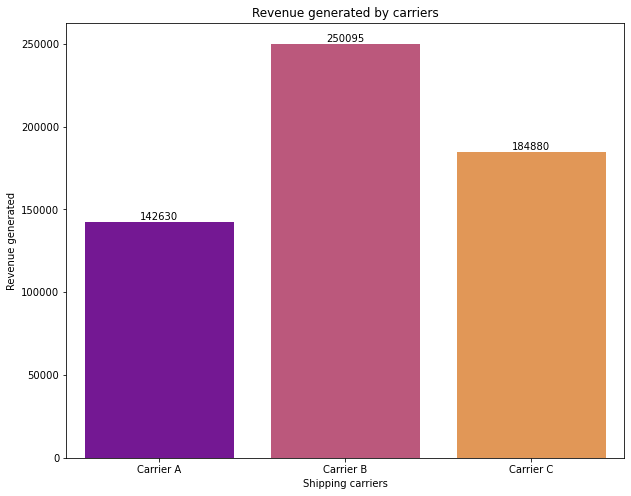

In [25]:
plt.figure(figsize=(10,8))
d=sns.barplot(x=cr['Shipping carriers'],y=cr['Revenue generated'], palette='plasma')
for container in d.containers:
    d.bar_label(container, fontsize=10)
plt.title('Revenue generated by carriers')

#### Although Carrier A has lowest shipping cost it has generated the least revenue and Carrier B being the most expensive has generated most revenue. So, Carrier A might be slower in shipping the items.

In [26]:
mc= df.groupby(['Transportation modes','Routes'])['Costs'].sum().reset_index()
mc['Costs']= round(mc['Costs'],2)
mc

,Transportation modes,Routes,Costs
0,Air,Route A,5800.89
1,Air,Route B,4464.86
2,Air,Route C,4338.78
3,Rail,Route A,6790.71
4,Rail,Route B,7007.41
5,Rail,Route C,1370.81
6,Road,Route A,5934.41
7,Road,Route B,7181.09
8,Road,Route C,2932.70
9,Sea,Route A,2349.76


Text(0.5, 1.0, 'Transportation modes and cost by routes')

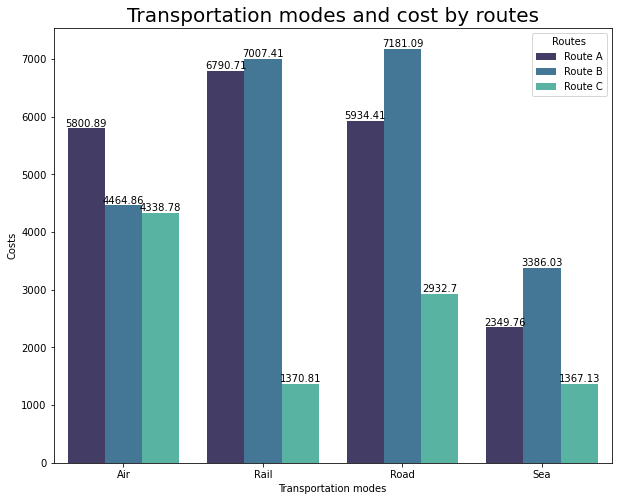

In [27]:
plt.figure(figsize=(10,8))
j=sns.barplot(x=mc['Transportation modes'],y=mc['Costs'],hue=mc['Routes'],palette='mako')
for container in j.containers:
    j.bar_label(container, fontsize=10)
plt.title('Transportation modes and cost by routes',fontsize=20)

#### All the carriers in sea route have lowest shipping costs, Route C being the lowest.
#### Route B has highest cost in all modes except air where route A is the most expensive.
#### Road route B is the costliest among all modes and routes.

In [28]:
mt= df.groupby(['Transportation modes','Routes'])['Shipping times'].mean().reset_index()
mt['Shipping times']= round(mt['Shipping times'],2)
mt

,Transportation modes,Routes,Shipping times
0,Air,Route A,5.27
1,Air,Route B,5.29
2,Air,Route C,4.75
3,Rail,Route A,6.36
4,Rail,Route B,6.64
5,Rail,Route C,7.33
6,Road,Route A,5.36
7,Road,Route B,4.77
8,Road,Route C,3.20
9,Sea,Route A,7.57


Text(0.5, 1.0, 'Transportation modes and shipping time by routes')

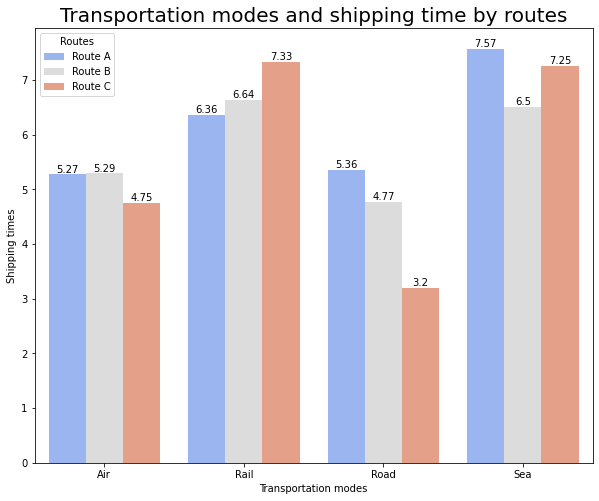

In [29]:
plt.figure(figsize=(10,8))
j=sns.barplot(x=mt['Transportation modes'],y=mt['Shipping times'],hue=mt['Routes'],palette='coolwarm')
for container in j.containers:
    j.bar_label(container, fontsize=10)
plt.title('Transportation modes and shipping time by routes',fontsize=20)

#### For air, route C is fastest and route B is the slowest.
#### For Rail, route A is the fastest and route C is the slowest.
#### For Road, route C is the fastest and route A is slowest.
#### For Sea, route B is the fastest and route A is the slowest.
#### Among all the modes, sea takes the longest time for shipping and road takes the minimum time for all routes. 

### So to conclude, the road route C is proven cost and time reliable as it has lowest cost and fastest shipping time.

In [30]:
time=df.groupby(['Shipping carriers','Transportation modes'])['Shipping times'].mean().reset_index()
time['Shipping times']= round(time['Shipping times'],2)
time

,Shipping carriers,Transportation modes,Shipping times
0,Carrier A,Air,5.60
1,Carrier A,Rail,7.43
2,Carrier A,Road,5.18
3,Carrier A,Sea,7.00
4,Carrier B,Air,4.21
5,Carrier B,Rail,6.33
6,Carrier B,Road,4.91
7,Carrier B,Sea,6.67
8,Carrier C,Air,6.57
9,Carrier C,Rail,6.17


Text(0.5, 1.0, 'Transportation modes and time by Shipping carriers')

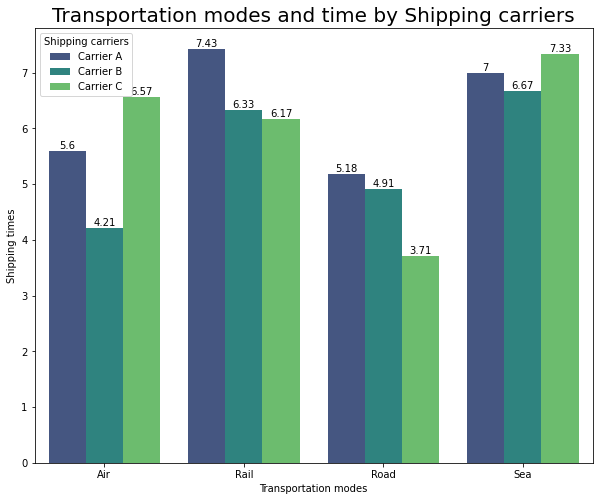

In [31]:
plt.figure(figsize=(10,8))
p=sns.barplot(x=time['Transportation modes'], y=time['Shipping times'],hue=time['Shipping carriers'], palette='viridis')
for container in p.containers:
    p.bar_label(container,fontsize=10)
plt.title('Transportation modes and time by Shipping carriers',fontsize=20)

#### Among all the modes, sea takes the longest time for shipping and road takes the minimum time for all carriers.
#### For air, carrier B is fastest and carrier C is slowest.
#### For rail, carrier C is fastest and carrier A is slowest.
#### For road, carrier C is fastest and carrier A is slowest.
#### For sea, carrier B is fastest and carrier A is slowest.

In [32]:
tc=df.groupby(['Shipping carriers','Transportation modes'])['Shipping costs'].mean().reset_index()
tc['Shipping costs']= round(tc['Shipping costs'],2)
tc

,Shipping carriers,Transportation modes,Shipping costs
0,Carrier A,Air,6.25
1,Carrier A,Rail,6.40
2,Carrier A,Road,5.47
3,Carrier A,Sea,3.88
4,Carrier B,Air,6.22
5,Carrier B,Rail,5.23
6,Carrier B,Road,4.98
7,Carrier B,Sea,5.55
8,Carrier C,Air,5.46
9,Carrier C,Rail,4.98


Text(0.5, 1.0, 'Transportation modes and costs by Shipping carriers')

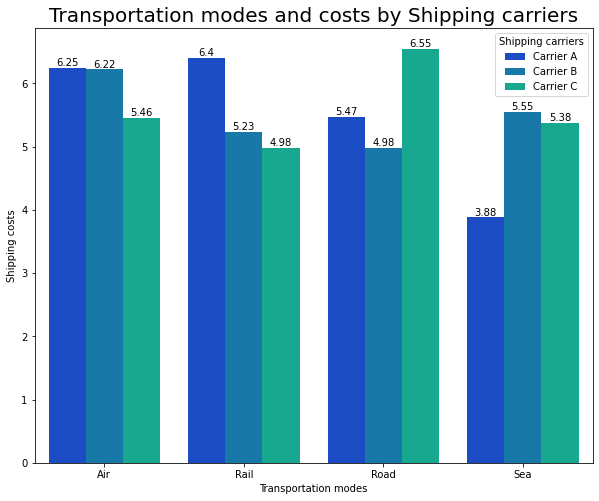

In [33]:
plt.figure(figsize=(10,8))
p=sns.barplot(x=tc['Transportation modes'], y=tc['Shipping costs'],hue=tc['Shipping carriers'], palette='winter')
for container in p.containers:
    p.bar_label(container,fontsize=10)
plt.title('Transportation modes and costs by Shipping carriers',fontsize=20)

### Carrier B is the most efficient in terms of cost and time as it sits in middle for the cost and mostly fastest among all modes of transportation.

#### Carrier B generates highest revenue and is most efficeint in terms of time and cost.
#### Road route C is the most relibale in terms of cost and time.
### So, Carrier B selecting Road Route C will be the best.